<a href="https://colab.research.google.com/github/tejasvipver/Data-Science-project/blob/main/Diabetes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction Using ML**

---



1st step :  **Importing Libraries**

Pandas :- is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming.

Numpy  :-is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

Matplotlib :- is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn :- is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical.

Scikit :- is a free software machine learning library for the Python programming language.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2nd step :  Loading the raw data or dataset from kaggle
              **Data Collection step**

For this head() and tail() is used to know the dimension and nature of dataset

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


 shape is used to know the total count of observation and vriables.
 if we have too many rows and columns then it would take long time to run the algorithm and train the model.

In [ ]:
df.shape

(768, 9)

**statistical summary of data**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 represents non-diabetic

1 represents diabetic

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


This helps to know that in a particular row (ex glucose) non-diabetic are having low glucose level than diabetic.

**To know the datatypes of the values**
It is another good practice to know data type of each attribute. The reason behind is that, as per to the requirement, sometimes we may need to convert one data type to another. For example, we may need to convert string into floating point or int for representing categorial or ordinal values. We can have an idea about the attribute’s data type by looking at the raw data, but another way is to use dtypes property of Pandas DataFrame. With the help of dtypes property we can categorize each attributes data type.

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data Cleaning**
checking any null values

In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

To know the column name

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**HISTROGRAM**

Univariate Plots: Understanding Attributes Independently

The simplest type of visualization is single-variable or “univariate” visualization. With the help of univariate visualization, we can understand each attribute of our dataset independently.

Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset. The following are some of the characteristics of histograms −

It provides us a count of the number of observations in each bin created for visualization.

From the shape of the bin, we can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.

Histograms also help us to see possible outliers.

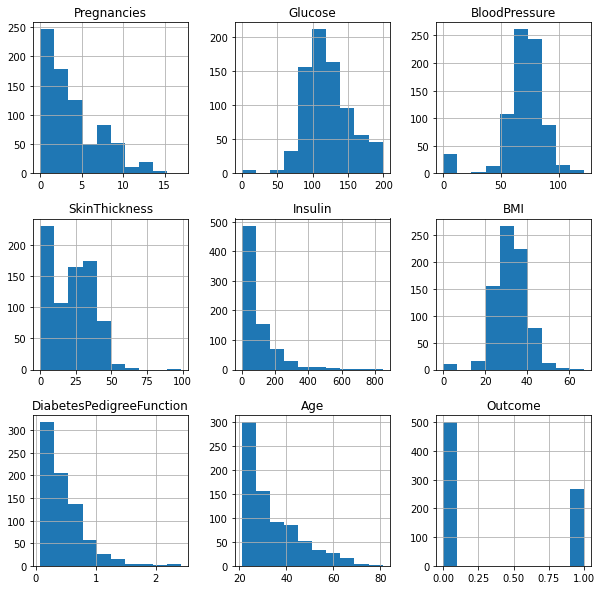

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

The above output shows that it created the histogram for each attribute in the dataset.
From this, we can observe that perhaps age, pedi and test attribute may have exponential distribution while mass and plas have Gaussian distribution.

**Density Plots**

Another quick and easy technique for getting each attributes distribution is Density plots. It is also like histogram but having a smooth curve drawn through the top of each bin. We can call them as abstracted histograms.

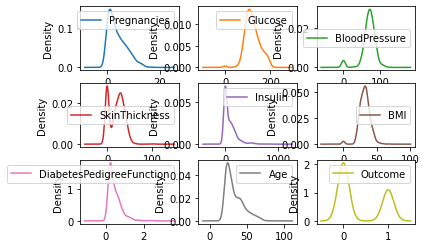

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

**Box and Whisker Plots**

Box and Whisker plots, also called boxplots in short, is another useful technique to review the distribution of each attribute’s distribution. The following are the characteristics of this technique −

It is univariate in nature and summarizes the distribution of each attribute.

It draws a line for the middle value i.e. for median.

It draws a box around the 25% and 75%.

It also draws whiskers which will give us an idea about the spread of the data.

The dots outside the whiskers signifies the outlier values. Outlier values would be 1.5 times greater than the size of the spread of the middle data.

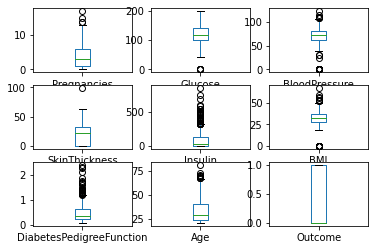

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False)
plt.show()

From the above plot of attribute’s distribution, it can be observed that age, test and skin appear skewed towards smaller values.

**Multivariate Plots: Interaction Among Multiple Variables**

Another type of visualization is multi-variable or “multivariate” visualization. With the help of multivariate visualization, we can understand interaction between multiple attributes of our dataset. The following are some techniques in Python to implement multivariate visualization −

**Correlation Matrix Plot**

Correlation is an indication about the changes between two variables. In our previous chapters, we have discussed Pearson’s Correlation coefficients and the importance of Correlation too. We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


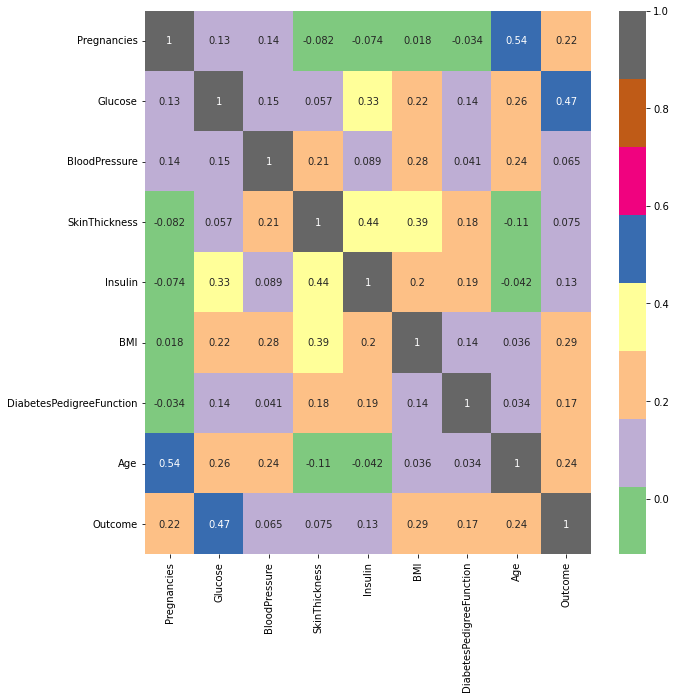

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g= sns.heatmap(df[top_corr_features].corr() ,annot=True,cmap='Accent')

From the above output of correlation matrix, we can see that it is symmetrical i.e. the bottom left is same as the top right. It is also observed that each variable is positively correlated with each other.

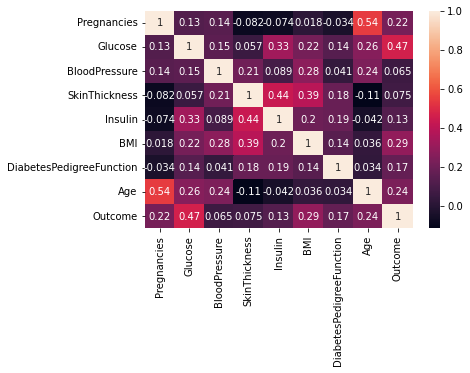

In [ ]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

**Scatter Matrix Plot**

Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimensions. Scatter plots are very much like line graphs in the concept that they use horizontal and vertical axes to plot data points.



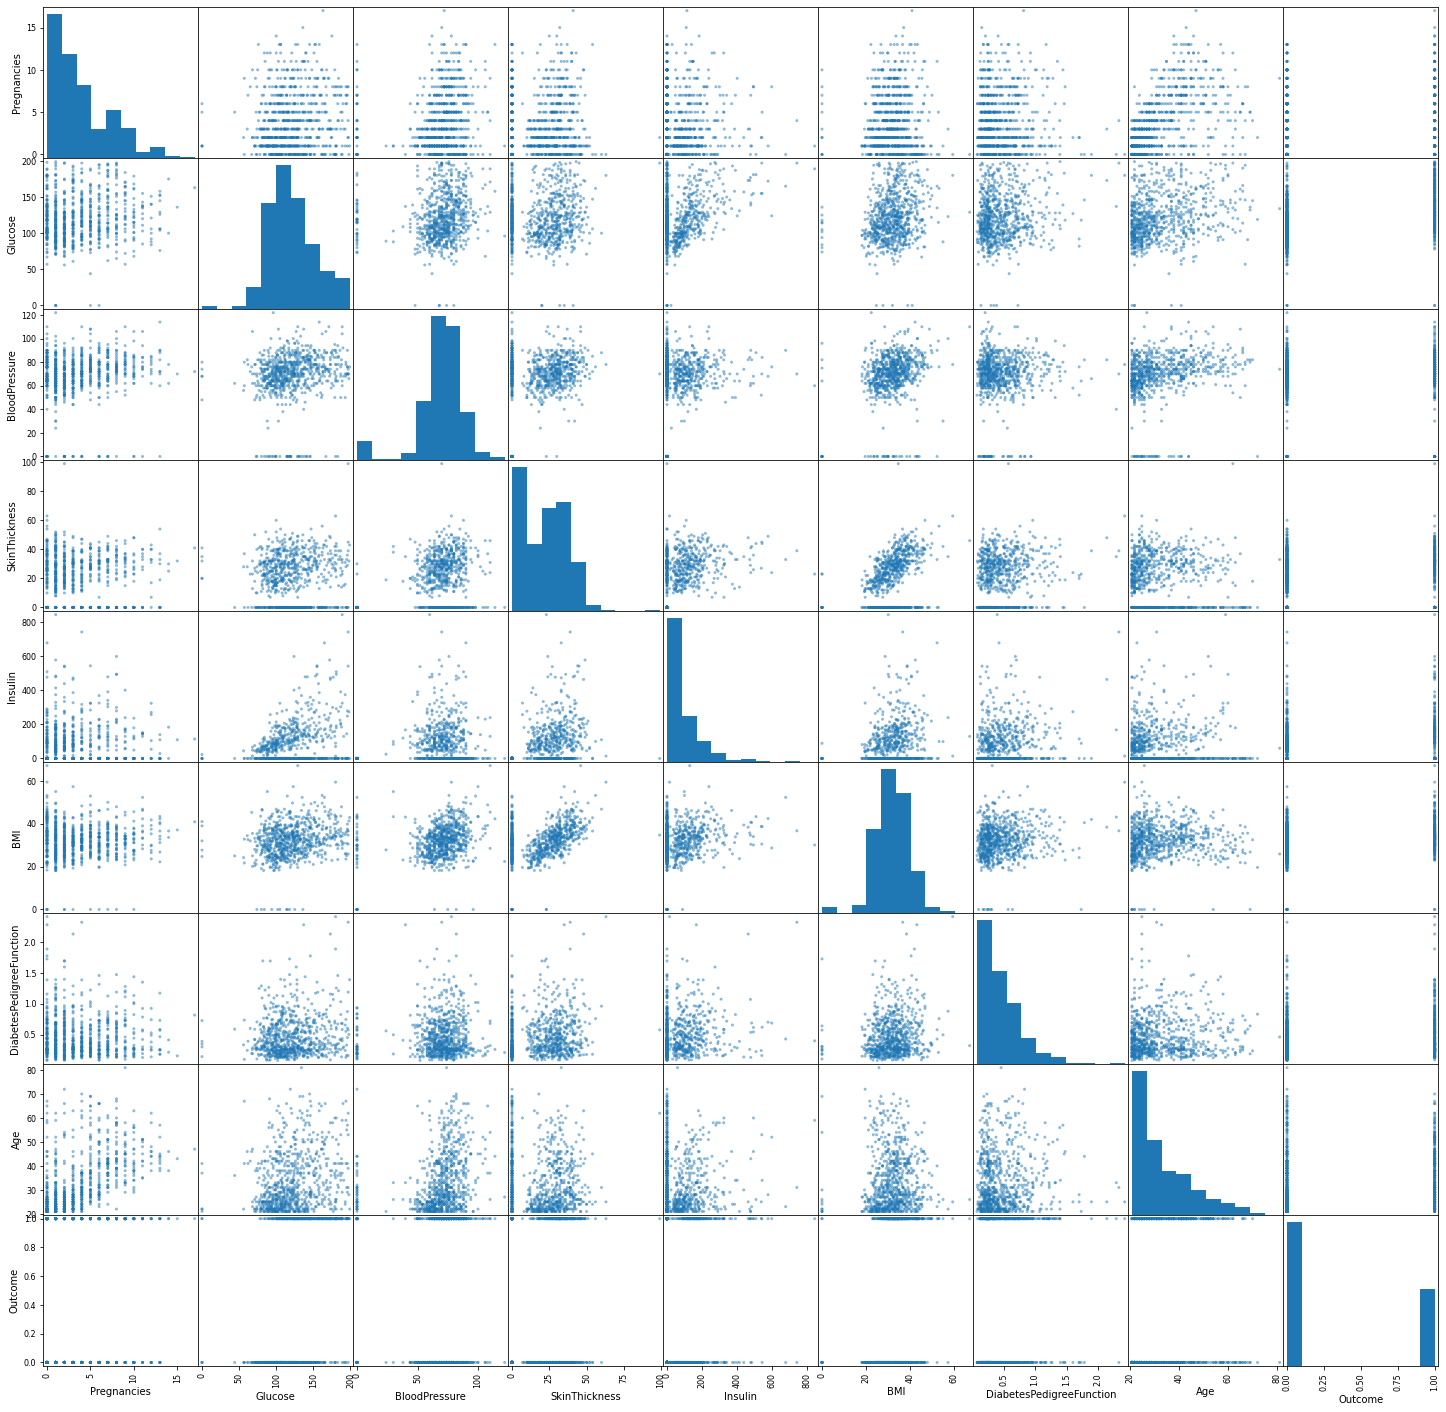

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (25,25));

**Pairplot**

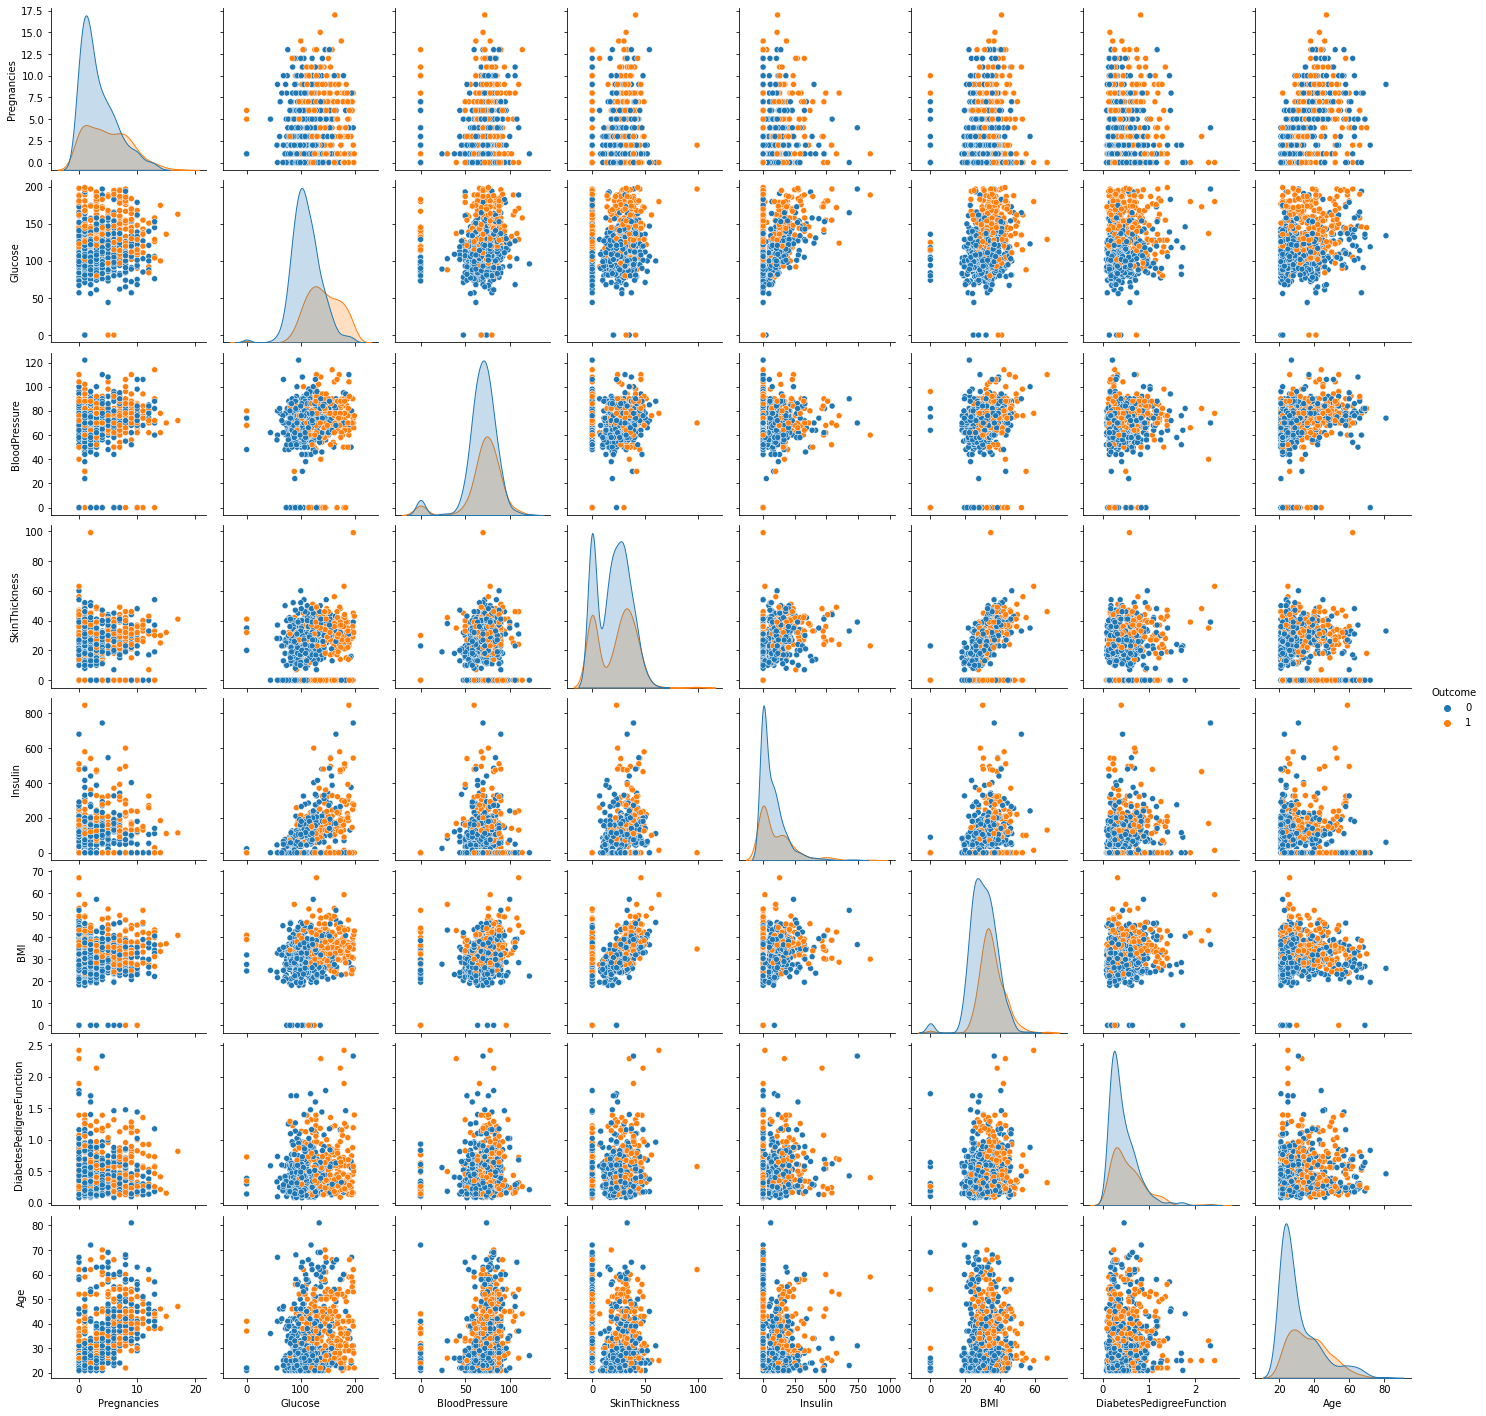

In [ ]:
sns.pairplot(data=df,hue='Outcome')
plt.show()

**Data preprocessing**

After selecting the raw data for ML training, the most important task is data pre-processing. In broad sense, data preprocessing will convert the selected data into a form we can work with or can feed to ML algorithms. We always need to preprocess our data so that it can be as per the expectation of machine learning algorithm.

**1. Scaling**
Most probably our dataset comprises of the attributes with varying scale, but we cannot provide such data to ML algorithm hence it requires rescaling. Data rescaling makes sure that attributes are at same scale. Generally, attributes are rescaled into the range of 0 and 1. ML algorithms like gradient descent and k-Nearest Neighbors requires scaled data. We can rescale the data with the help of MinMaxScaler class of scikit-learn Python library.

separating the dependent and independent variable

In [ ]:
X = df.drop(columns ='Outcome',axis=1)
Y = df['Outcome']

drop is used to separate the dependent(outcome) from independent values.

In [ ]:
print (X)
print (Y)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

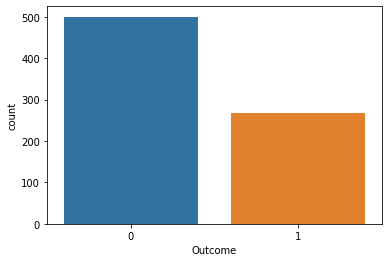

In [ ]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)

**Data Standardisation**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


**Feature selection**

The performance of machine learning model is directly proportional to the data features used to train it. The performance of ML model will be affected negatively if the data features provided to it are irrelevant. On the other hand, use of relevant data features can increase the accuracy of your ML model especially linear and logistic regression.

Performing feature selection before data modeling will reduce the overfitting.

Performing feature selection before data modeling will increases the accuracy of ML model.

Performing feature selection before data modeling will reduce the training time

**feature Impotance**

 feature importance technique is used to choose the importance features. It basically uses a trained supervised classifier to select features. We can implement this feature selection technique with the help of ExtraTreeClassifier class of scikit-learn Python library.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.10823568 0.23446749 0.09419368 0.08048698 0.07461561 0.14175284
 0.12055714 0.14569059]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

print("X_train size:", X_train.shape)
print("y_train size: ",y_train.shape,"\n")
print("X_test size:", X_test.shape)
print("y_test size:",y_test.shape)

X_train size: (614, 8)
y_train size:  (614,) 

X_test size: (154, 8)
y_test size: (154,)


these values are got by separating the dependent(X) and independent(Y) values. They together give 614+154=768

In [ ]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
603            7      150             78  ...  35.2                     0.692   54
118            4       97             60  ...  28.2                     0.443   22
247            0      165             90  ...  52.3                     0.427   23
157            1      109             56  ...  25.2                     0.833   23
468            8      120              0  ...  30.0                     0.183   38
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
192            7      159             66  ...  30.4                     0.383   36
629            4       94             65  ...  24.7                     0.148   21
559           11       85             74  ...  30.1                     0.300   35
684            5      136             82  ...   0.0                     0.640   69

[61

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

**ALGORITHMS IMPLEMENTING**

**1) LOGISTIC REGRESSION**

Introduction to Logistic Regression

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

**Logistic Regression Assumptions**

Before diving into the implementation of logistic regression, we must be aware of the following assumptions about the same −

In case of binary logistic regression, the target variables must be binary always and the desired outcome is represented by the factor level 1.

There should not be any multi-collinearity in the model, which means the independent variables must be independent of each other .

We must include meaningful variables in our model.

We should choose a large sample size for logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred = lr.predict(X_test)
lr_pred.shape

(154,)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Train Accuracy of Logistic Regression", lr.score(X_train, y_train)*100)
print ("Test Accuracy of Logistic Regression", lr.score(X_test, y_test)*100)
print (" Accuracy of Logistic Regression", accuracy_score(y_test, lr_pred)*100)

Train Accuracy of Logistic Regression 76.38436482084691
Test Accuracy of Logistic Regression 81.81818181818183
 Accuracy of Logistic Regression 81.81818181818183


A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes.

In [ ]:
cm_lr = confusion_matrix(y_test, lr_pred)
print(cm_lr)

[[98  9]
 [19 28]]


True Positive (TP) = 107; meaning 107 positive class data points were correctly classified by the model.
# *sick people correctly predicted as sick by the model.*

True Negative (TN) = 47; meaning 47 negative class data points were correctly classified by the model.
# *Healthy people correctly predicted as sick by the model*

False Positive (FP) = 0; meaning 0 negative class data points were incorrectly classified as belonging to the positive class by the model.
# *Healthy people incorrectly predicted as sick by the model.*

False Negative (FN) = 0; meaning 0 positive class data points were incorrectly classified as belonging to the negative class by the model.
# *sick people incorrectly predicted as not sick by the model.*

**Support vector machines (SVMs)**

 are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. They are extremely popular because of their ability to handle multiple continuous and categorical variables.

Working of SVM
An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

Support Vectors − Datapoints that are closest to the hyperplane is called support vectors. Separating line will be defined with the help of these data points.

Hyperplane − As we can see in the above diagram, it is a decision plane or space which is divided between a set of objects having different classes.

Margin − It may be defined as the gap between two lines on the closet data points of different classes. It can be calculated as the perpendicular distance from the line to the support vectors. Large margin is considered as a good margin and small margin is considered as a bad margin.

The main goal of SVM is to **divide the datasets into classes to find a maximum marginal hyperplane **(MMH) and it can be done in the following two steps −

First, SVM will generate hyperplanes iteratively that segregates the classes in best way.

Then, it will choose the hyperplane that separates the classes correctly.

**2)SVM**

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
sv_pred = sv.predict(X_test)
sv_pred.shape

(154,)

In [ ]:
print ("Train Accuracy of SVM", sv.score(X_train, y_train)*100)
print ("Test Accuracy of SVM", sv.score(X_test, y_test)*100)
print (" Accuracy of SVM ", accuracy_score(y_test, sv_pred)*100)

Train Accuracy of SVM 75.8957654723127
Test Accuracy of SVM 79.22077922077922
 Accuracy of SVM  79.22077922077922


**Decision tree analysis**

 is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decisions tress are the most powerful algorithms that falls under the category of supervised algorithms.

They can be used for both classification and regression tasks. The two main entities of a tree are decision nodes, where the data is split and leaves, where we got outcome. The example of a binary tree for predicting whether a person is fit or unfit providing various information like age, eating habits and exercise habits, is given below −

In the above decision tree, the question are decision nodes and final outcomes are leaves. We have the following two types of decision trees −

Classification decision trees − In this kind of decision trees, the decision variable is categorical. The above decision tree is an example of classification decision tree.

Regression decision trees − In this kind of decision trees, the decision variable is continuous.

**3) Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_pred = dt.predict(X_test)
dt_pred.shape

(154,)

In [ ]:
print ("Train Accuracy of Decision Tree ", dt.score(X_train, y_train)*100)
print ("Test Accuracy of Decision Tree", dt.score(X_test, y_test)*100)
print (" Accuracy of Decision Tree", accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Decision Tree  100.0
Test Accuracy of Decision Tree 77.92207792207793
 Accuracy of Decision Tree 77.92207792207793


**NAIVE-BAYES**

the assumption is that the presence of a feature in a class is independent to the presence of any other feature in the same class. For example, a phone may be considered as smart if it is having touch screen, internet facility, good camera etc. Though all these features are dependent on each other, they contribute independently to the probability of that the phone is a smart phone.

**Pros**

Naïve Bayes classification is easy to implement and fast.

It will converge faster than discriminative models like logistic regression.

It requires less training data

**CONS**

One of the most important cons of Naïve Bayes classification is its strong feature independence because in real life it is almost impossible to have a set of features which are completely independent of each other.

Another issue with Naïve Bayes classification is its ‘zero frequency’ which means that if a categorial variable has a category but not being observed in training data set, then Naïve Bayes model will assign a zero probability to it and it will be unable to make a prediction.

**4) NAIVE-BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_pred = nb.predict (X_test)
nb_pred.shape

(154,)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Train Accuracy of Naive Bayes", nb.score(X_train, y_train)*100)
print ("Test Accuracy of Naive Bayes", nb.score(X_test, y_test)*100)
print (" Accuracy of Naive Bayes", accuracy_score(y_test, nb_pred)*100)

Train Accuracy of Naive Bayes 75.7328990228013
Test Accuracy of Naive Bayes 79.22077922077922
 Accuracy of Naive Bayes 79.22077922077922


**Random forest**

is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

**Pros**

It overcomes the problem of overfitting by averaging or combining the results of different decision trees.

Random forests work well for a large range of data items than a single decision tree does.

Random forest has less variance then single decision tree.

**CONS**

Complexity is the main disadvantage of Random forest algorithms.

Construction of Random forests are much harder and time-consuming than decision trees.

More computational resources are required to implement Random Forest algorithm.

**K-means clustering algorithm **

computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by ‘K’ in K-means.

In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum. It is to be understood that less variation within the clusters will lead to more similar data points within same cluster.

**Pros**

It is very easy to understand and implement.

If we have large number of variables then, K-means would be faster than Hierarchical clustering.

On re-computation of centroids, an instance can change the cluster.

**CONS**
It is a bit difficult to predict the number of clusters i.e. the value of k.

Output is strongly impacted by initial inputs like number of clusters (value of k).

Order of data will have strong impact on the final output.


**5) KNN - K Nearest Neighbour (Clustering Algorithm )**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test)
knn_pred.shape

(154,)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Train Accuracy of KNN", knn.score(X_train, y_train)*100)
print ("Test Accuracy of KNN", knn.score(X_test, y_test)*100)
print (" Accuracy of KNN", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 78.50162866449512
Test Accuracy of KNN 75.32467532467533
 Accuracy of KNN 75.32467532467533


**Result** :- From this, Accuracy of

                              Logistic Regression 81.81

                              SVM  79.22077922077922

                              Decision Tree 77.92207792207793
                      
                               Naive Bayes 79.22

                               KNN 75.32

 maximum is **Logistic regression**
minimum is  **KNN**

**LR>SVM>NB>DT>KNN**




